
<div class="alert alert-block alert-info">
    
This is a starter notebook to showcase the [Emotion Dataset for Emotion Recognition Tasks](https://www.kaggle.com/parulpandey/emotion-dataset) 
    
</div>

What next?
Now that we have done some preliminary exploration of the dataset, the next is to use this dataset to create an emotion classifier. This could be a great project to add to your resume and you can also share your trained model with the community.

In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing the dataset

In [2]:
train = pd.read_csv('./emotion-dataset/training.csv')
test = pd.read_csv('./emotion-dataset/test.csv')
validation = pd.read_csv('./emotion-dataset/validation.csv')

## Creating a column with label names.
The label column currently has integers. To make it more understandable, we’ll create a new column called description containing the description of each integer in the label column.

In [3]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()


,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Distribution of the labels in the training set

It’ll be informative to look at the distribution of the labels. This will also give us an idea of the imbalance in the dataset, if any.

In [4]:
train['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

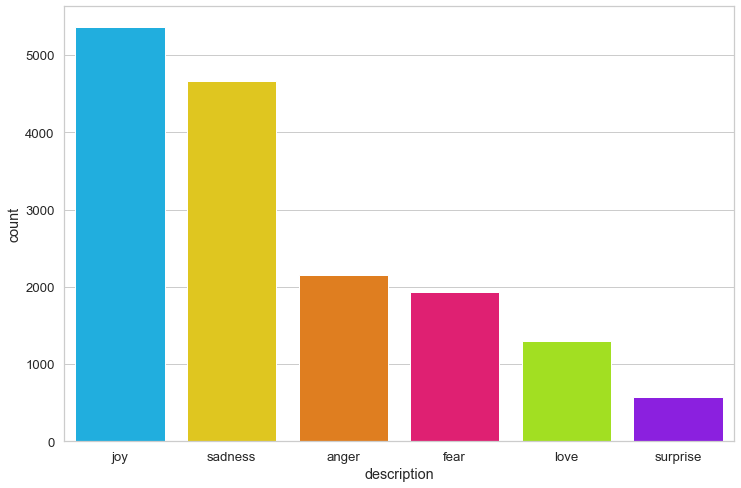

In [5]:
sns.countplot(train['description'],order = train['description'].value_counts(normalize=True).index)

About 33 percent of the tweets are joyful, followed by sad and angry tweets.

## Analyzing Text Statistics
* We can now do some statistical analysis to explore the fundamental characteristics of the text data. Some of the analyses which can be helpful are:
    * Text length analysis: calculating the length of the text, and
    * word frequency analysis: calculating the word count in the form of unigrams, bigrams and trigrams.

In [6]:
train['text_length'] = train['text'].astype(str).apply(len)
train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))

## Tweet length analysis


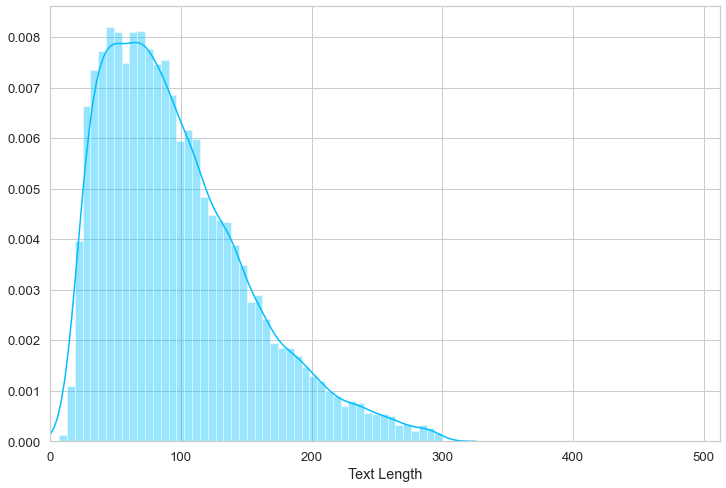

In [7]:
sns.distplot(train['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

The histogram above shows that the length of the tweet ranges from around 2 to 300 characters.

## Tweet word count analysis
Now let’s analyze the frequency of the words per tweet per class.

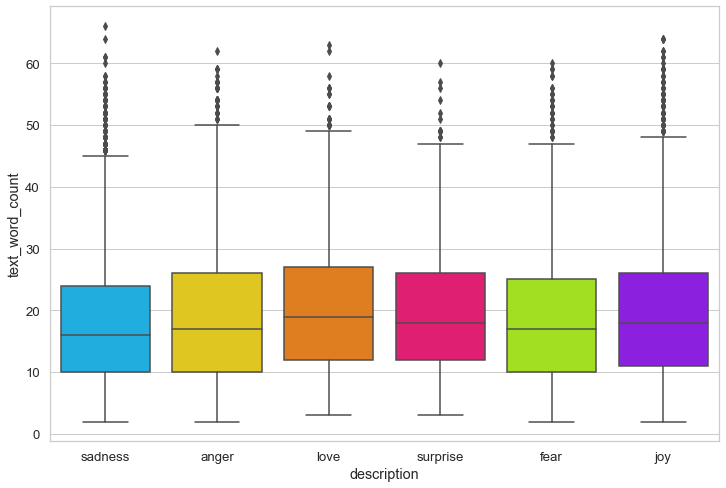

In [8]:
sns.boxplot(x="description", y="text_word_count", data=train)

Most of the tweets have an average of 15 words. Also, all the tweets appear to have the more or less the same length. Hence, the length of the tweet isn’t a powerful indicator of polarity.

## Distribution of top n-grams
An [n-gram is a contiguous sequence of n items from a given sample of text or speec](https://en.wikipedia.org/wiki/N-gram)h. It is also a good idea to look at various n-grams to understand which words mainly occur together. For instance, we look at the distribution of unigrams, bigrams, and trigrams across emotions- sadness, anger, and love. You can replicate the same for other categories using this code.

In [9]:
# Creating individual dataframes of different emotions
sadness = train[train['label']==0]['text']
joy = train[train['label']==1]['text']
love = train[train['label']==2]['text']
anger = train[train['label']==3]['text']
fear = train[train['label']==4]['text']
surprise = train[train['label']==5]['text']

In [10]:
# Code to calculate ngrams
# source of code : https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [11]:
# calculating unigrmas, bigrams and trigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]


## Visualizing the ngrams for some of the emotions

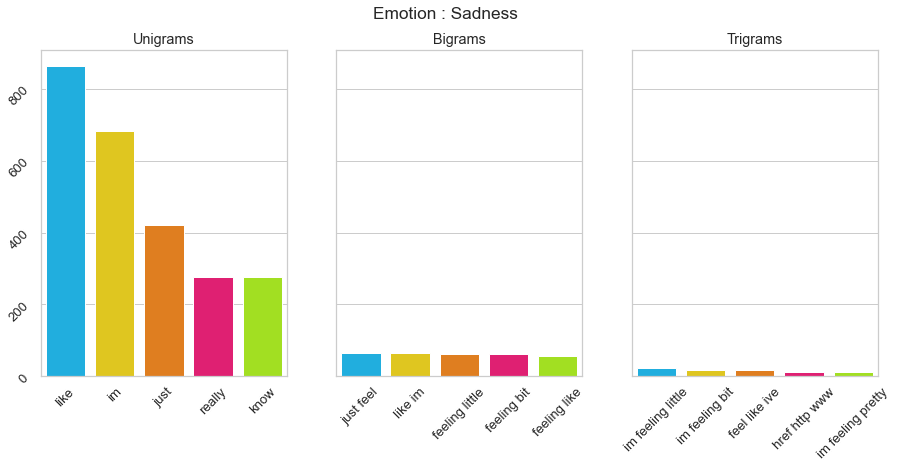

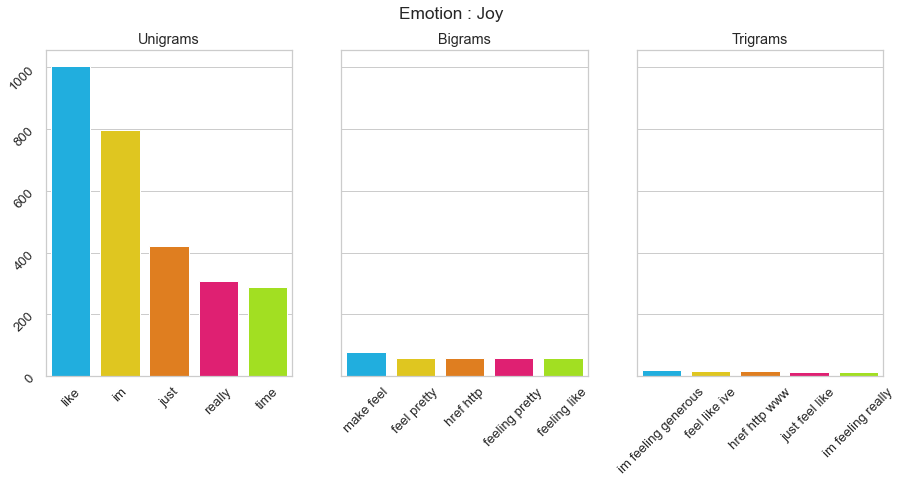

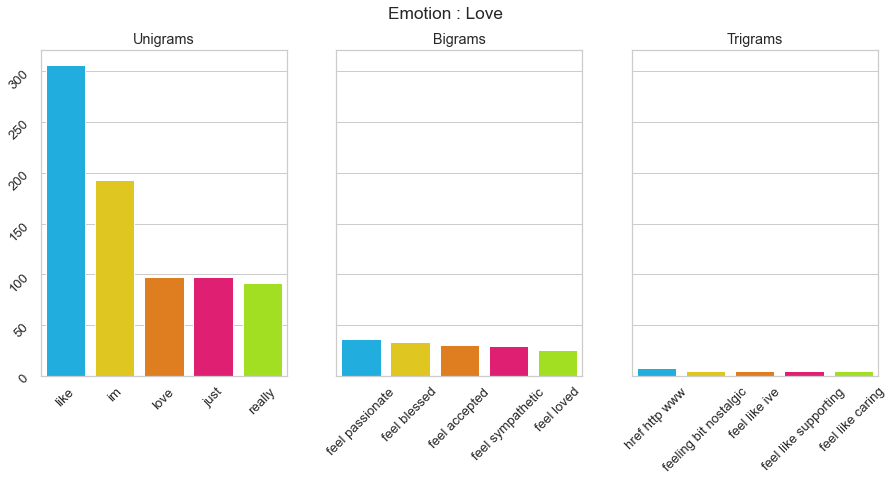

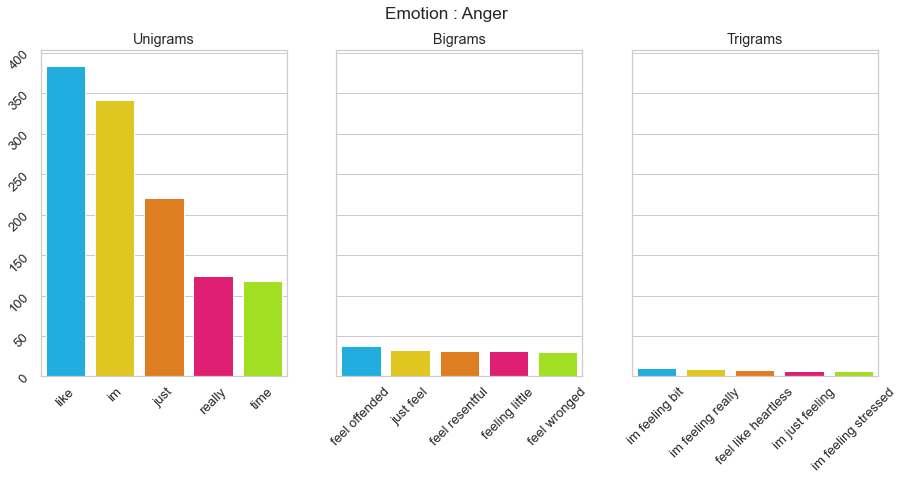

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot( list(dict(sad_unigrams).keys()), list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_bigrams).keys()), list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_trigrams).keys()), list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot( list(dict(joy_unigrams).keys()), list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(joy_bigrams).keys()), list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot( list(dict(joy_trigrams).keys()), list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot( list(dict(love_unigrams).keys()), list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(love_bigrams).keys()), list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(love_trigrams).keys()), list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot( list(dict(anger_unigrams).keys()), list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(anger_bigrams).keys()), list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(anger_trigrams).keys()), list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


## What next?
Now that we have done some preliminary exploration of the dataset, the next is to use this dataset to create an emotion classifier. This could be a great project to add to your resume and you can also share your trained model with the community. You can also checkout some of the notebooks below:

### Helper Notebooks provided by authors
- Here is a [notebook](https://colab.research.google.com/drive/1nwCE6b9PXIKhv2hvbqf1oZKIGkXMTi1X#scrollTo=t23zHggkEpc-) showing how to use it for fine-tuning a pretrained language model for the task of emotion classification.

- Here is another [notebook](https://colab.research.google.com/drive/176NSaYjc2eeI-78oLH_F9-YV3po3qQQO?usp=sharing) which shows how to fine-tune T5 model for emotion classification along with other tasks.

- Here is also a hosted [fine-tuned model](https://huggingface.co/mrm8488/distilroberta-base-finetuned-sentiment) on HuggingFace which you can directly use for inference in your NLP pipeline. 